In [4]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Compute the following:

- Comparison with women’s occupation participation 
- Comparison with ethnic occupation participation 

Look at carpenter, engineer, mechanic, secretary, housekeeper, nurse, librarian, dancer.

For ethnicities: 

Housekeeper Professor Smith Mason Official Blacksmith Artist Secretary Surveyor Janitor Conductor Sheriff Dancer Physicist Weaver Mechanic Scientist Administrator Photographer Chemist Mason Baker Tailor Statistician Cashier Accountant Clergy Driver Engineer Photographer

In [3]:
# Define the list of model prefixes
variable_names = [
    'movies_1921_1930',
    'movies_1931_1940',
    'movies_1941_1950',
    'movies_1951_1960',
    'movies_1961_1970',
    'movies_1971_1980',
    'movies_1981_1990',
    'movies_1991_2000',
    'movies_2001_2010'
]

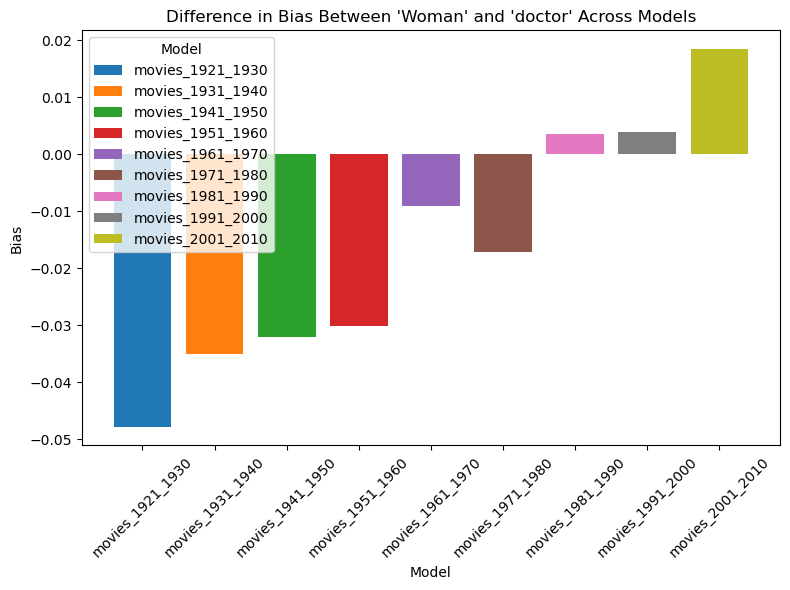

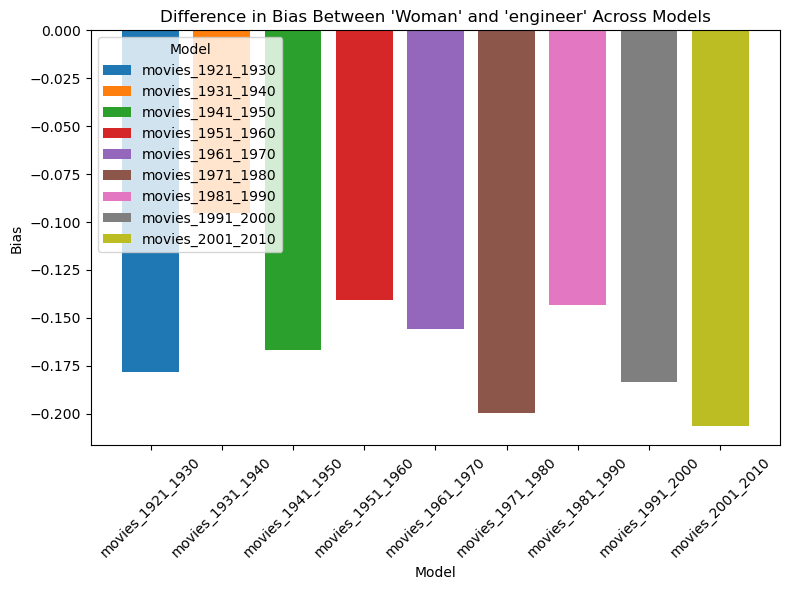

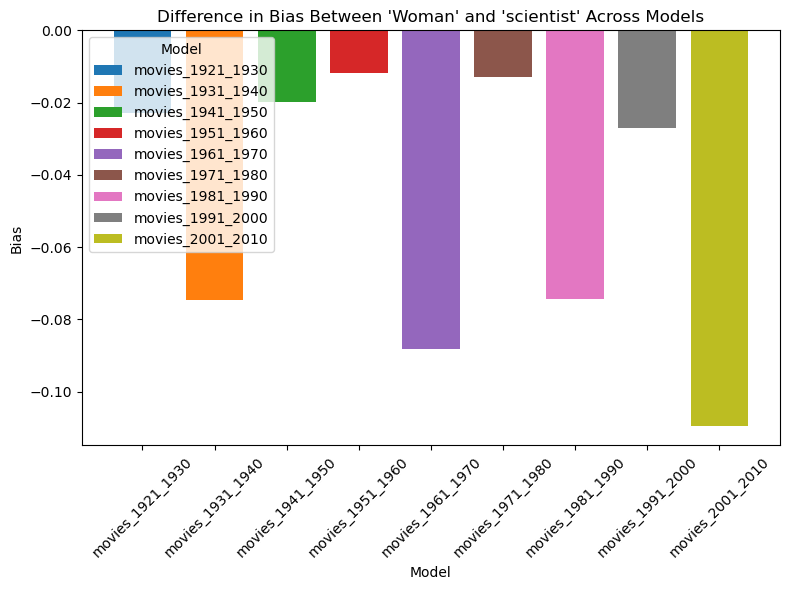

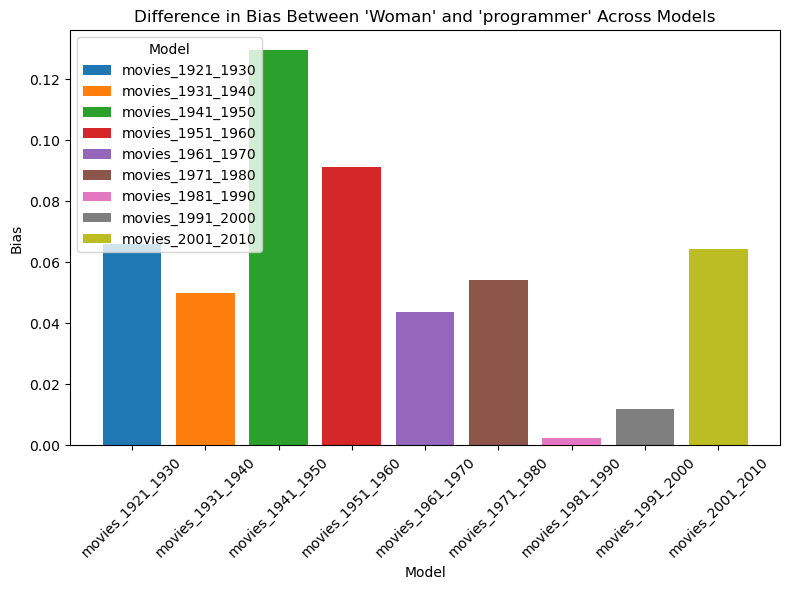

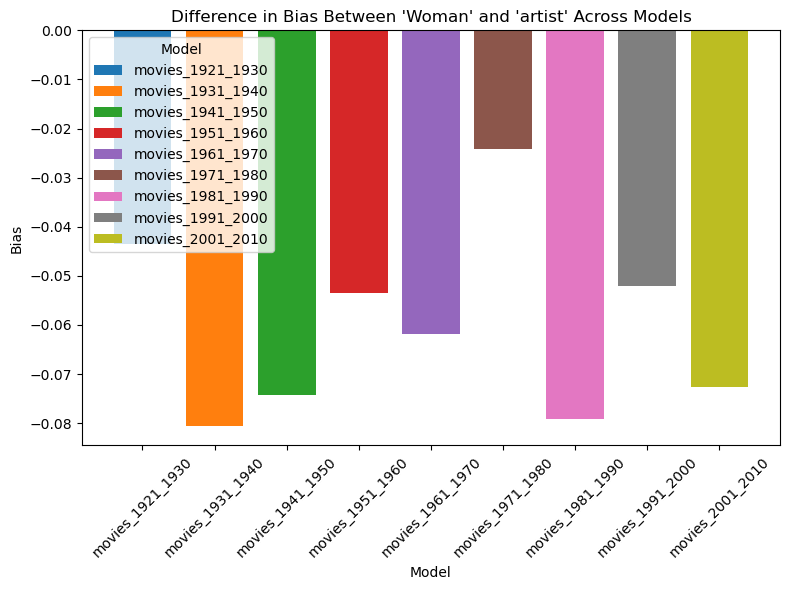

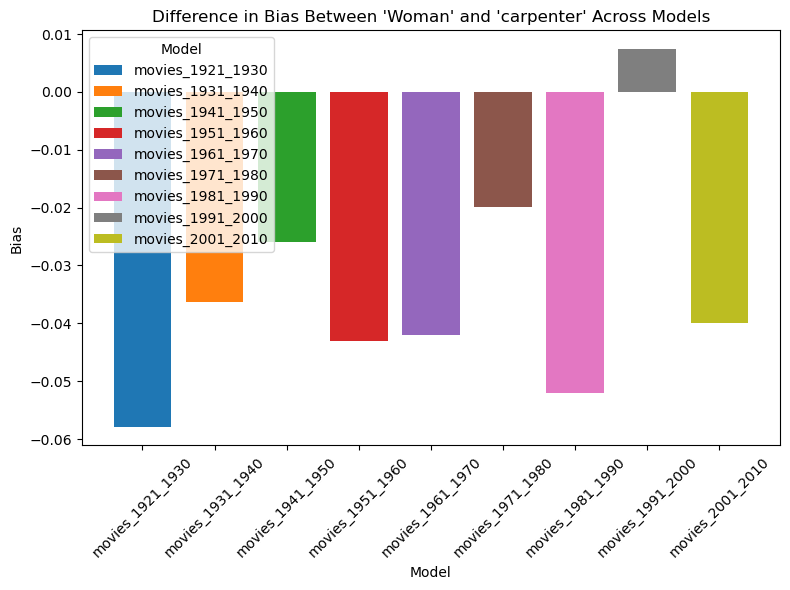

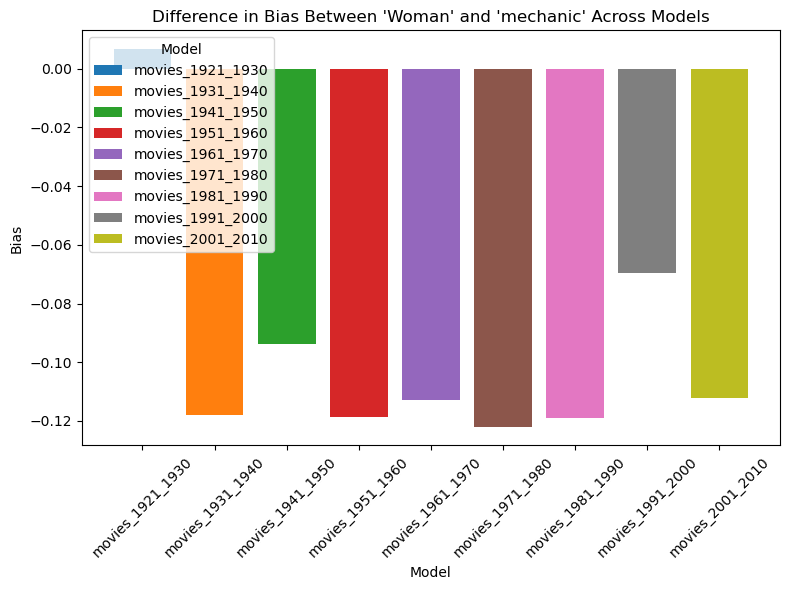

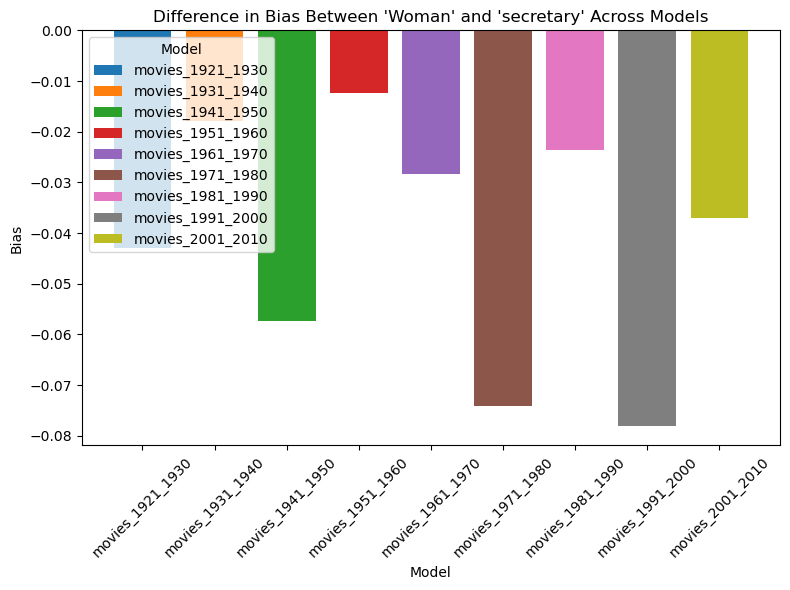

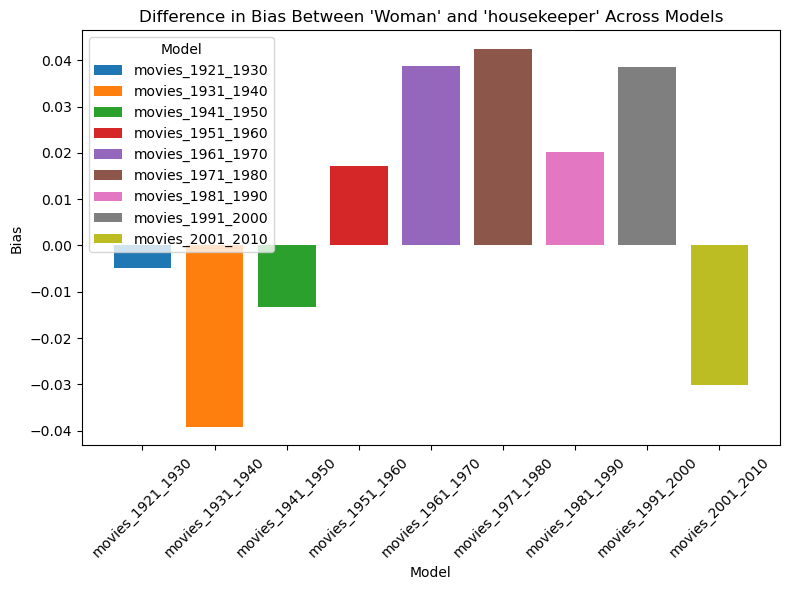

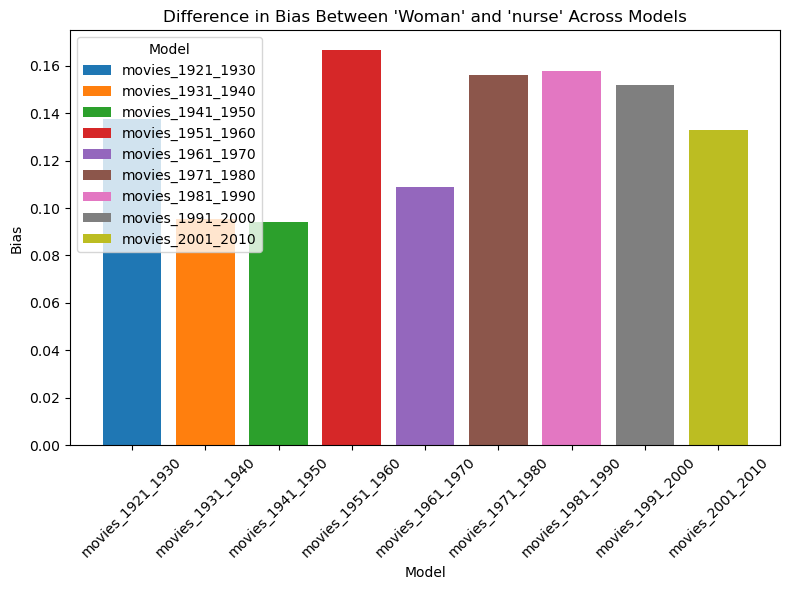

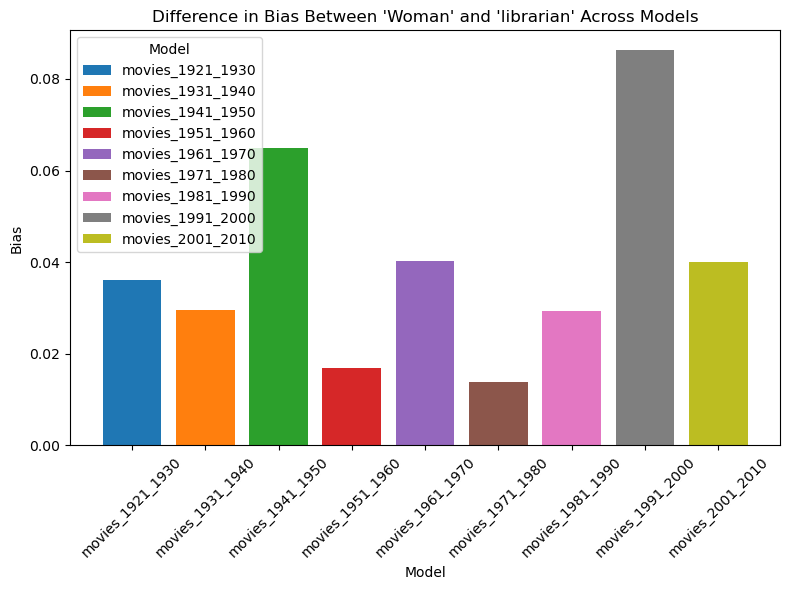

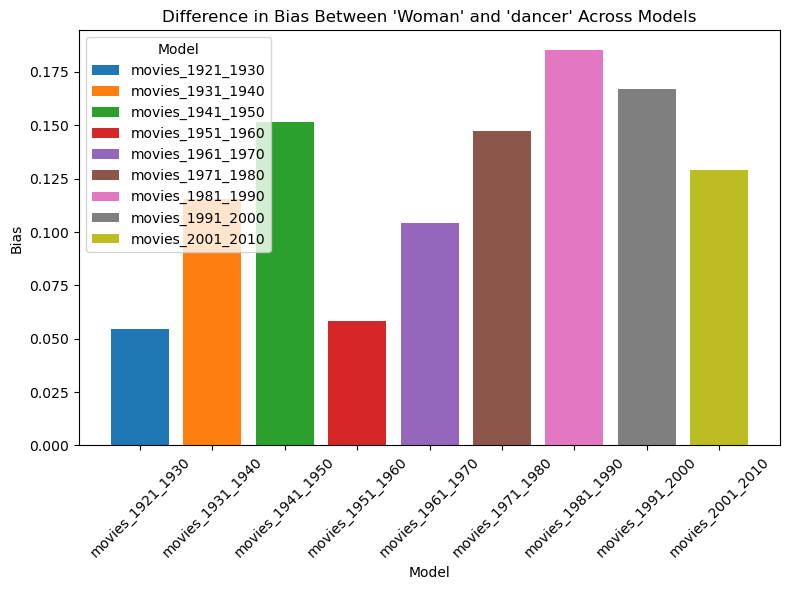

In [8]:
# Define list of all occupations
occupations = ['doctor', 'engineer', 'scientist', 'programmer', 'artist',
               'carpenter', 'mechanic', 'secretary', 'housekeeper',
               'nurse', 'librarian', 'dancer']

# Initialize an empty DataFrame to store bias values
bias_df = pd.DataFrame(index=occupations, columns=variable_names)

# Calculate bias for each model
for name in variable_names:
    # Load the model
    model_filename = f"word2vec-{name}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    
    # Calculate bias between "woman" and each occupation
    for occupation in occupations:
        bias = model.wv.similarity('woman', occupation) - model.wv.similarity('man', occupation)
        bias_df.loc[occupation, name] = bias

# Sort occupations by descending order of bias for the first model
sorted_occupations = bias_df.sort_values(by=variable_names[0], ascending=False).index

# Plot individual charts for each word pair
for occupation in occupations:
    plt.figure(figsize=(8, 6))
    for name in variable_names:
        plt.bar(name, bias_df.loc[occupation, name], label=name)
    plt.title(f"Difference in Bias Between 'Woman' and '{occupation}' Across Models")
    plt.xlabel('Model')
    plt.ylabel('Bias')
    plt.xticks(rotation=45)
    plt.legend(title='Model', loc='upper left')
    plt.tight_layout()
    plt.show()


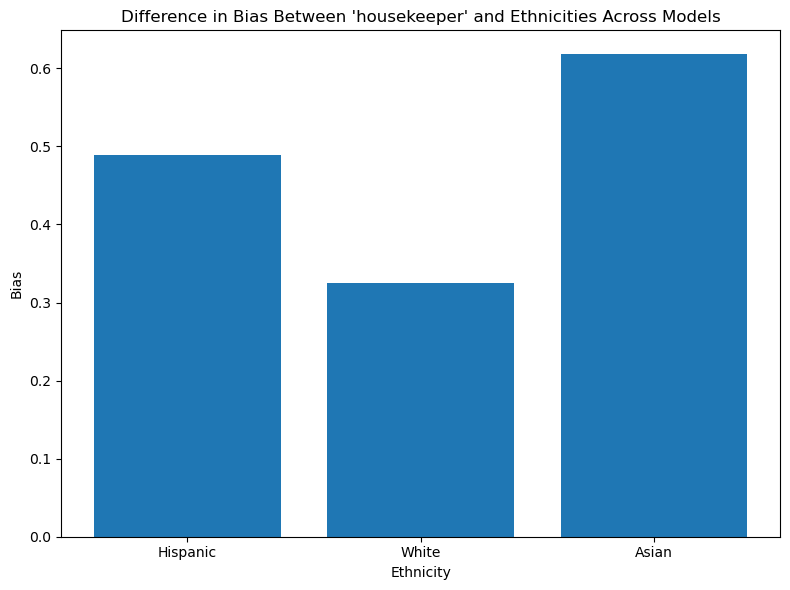

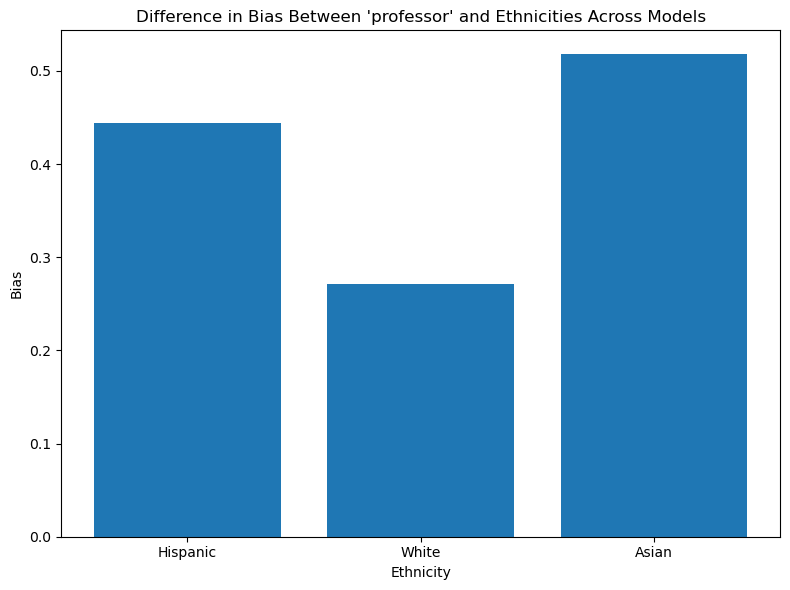

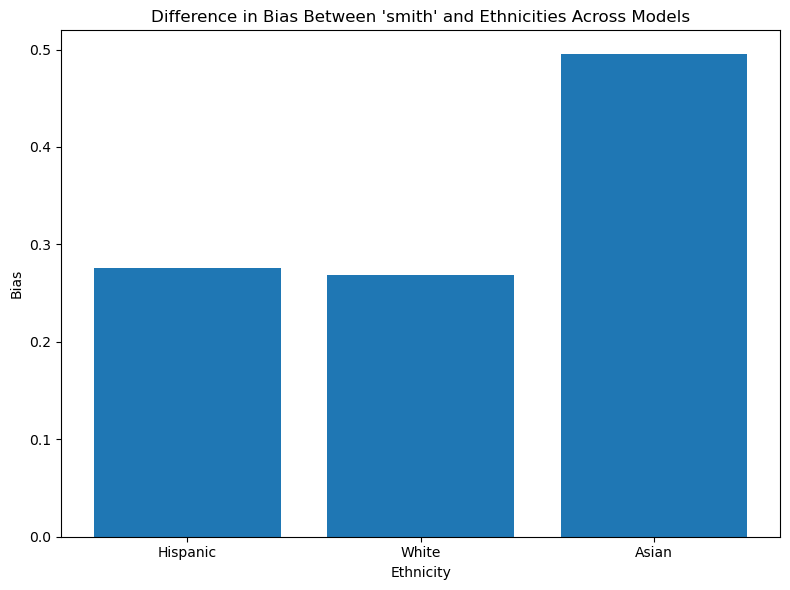

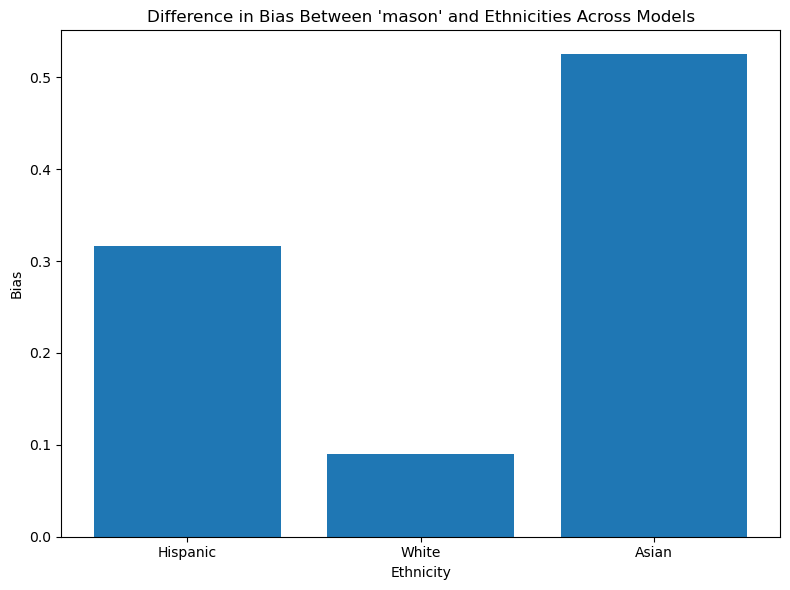

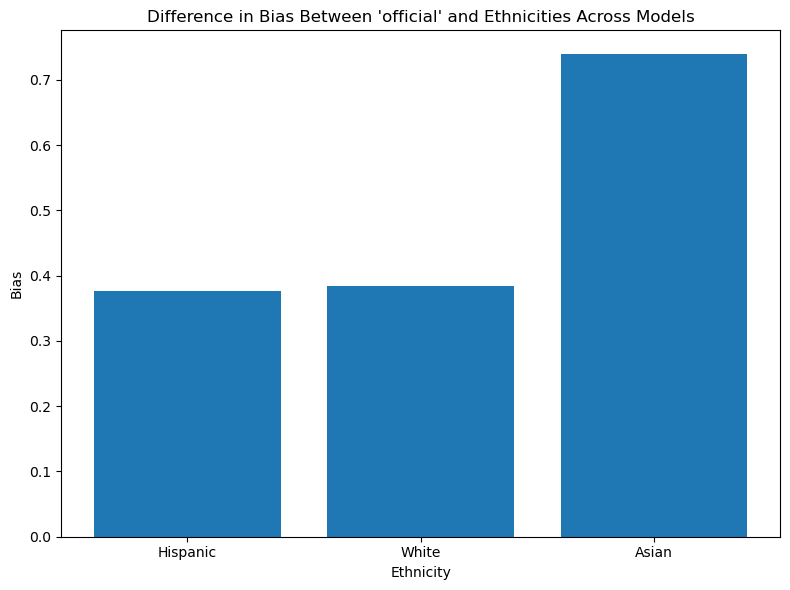

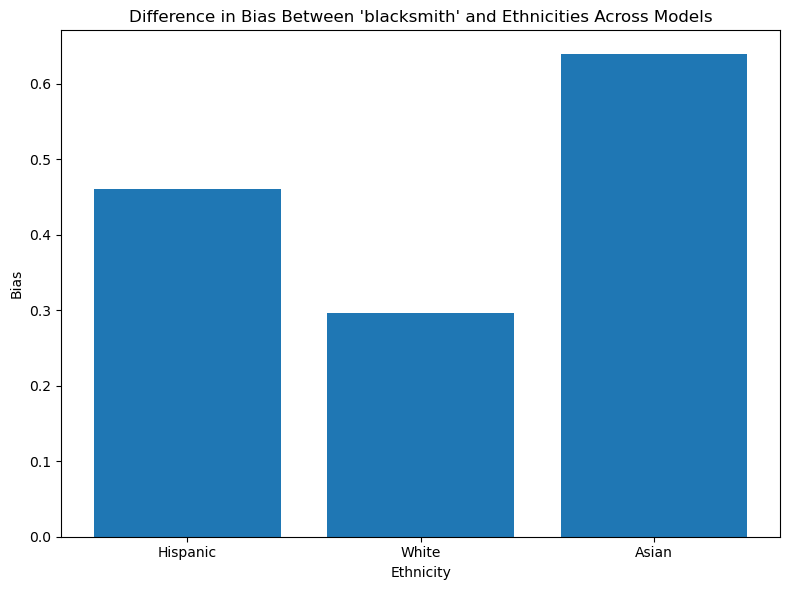

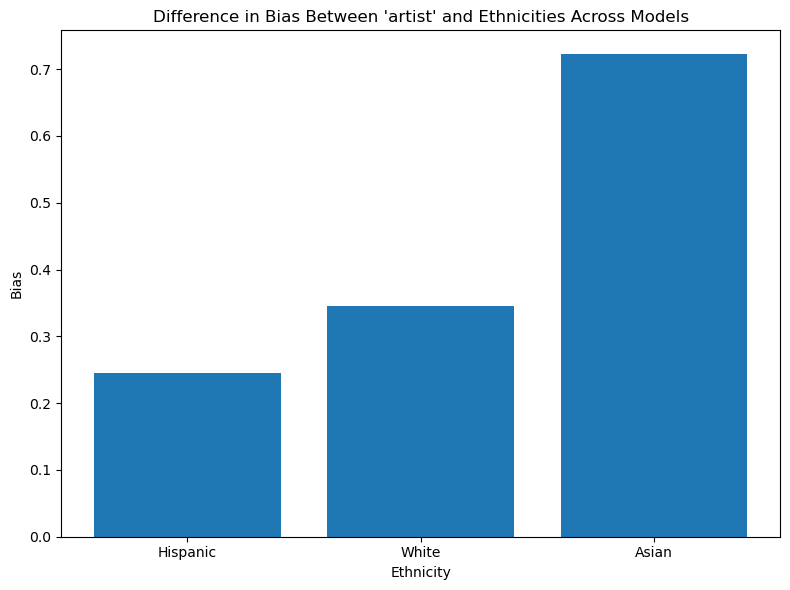

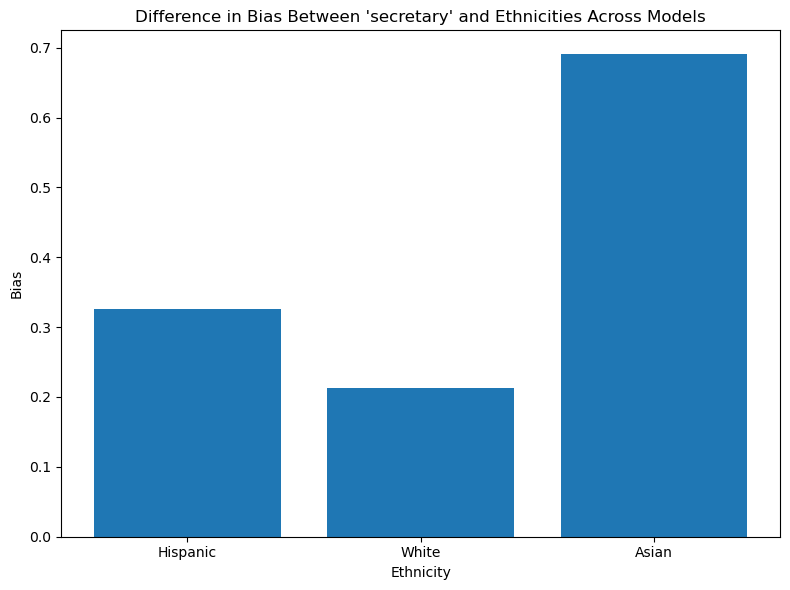

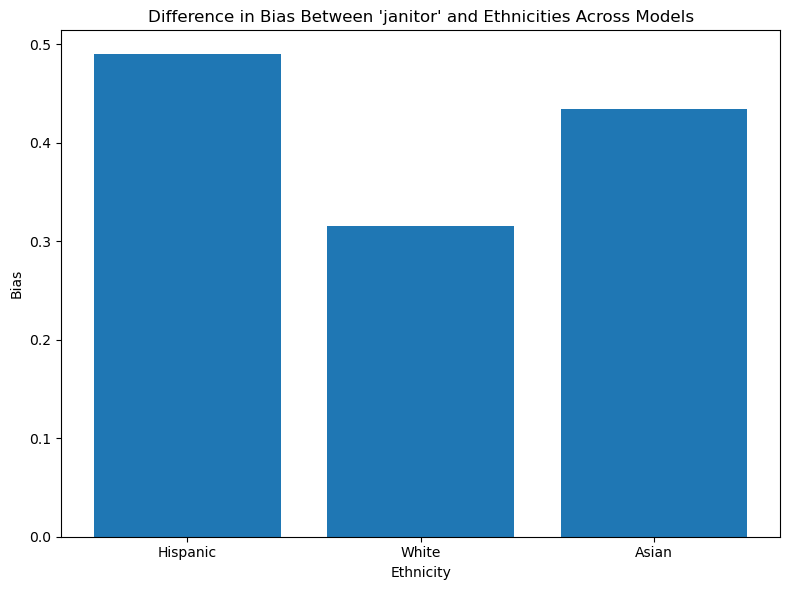

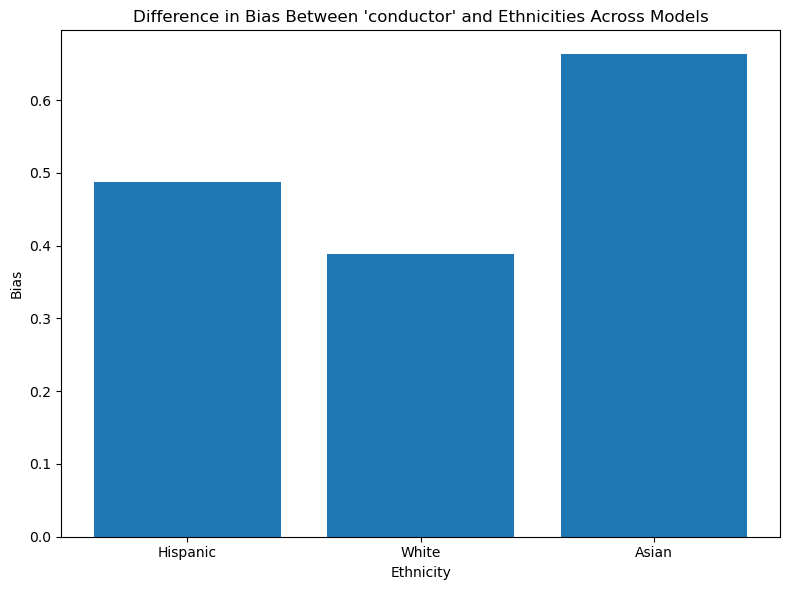

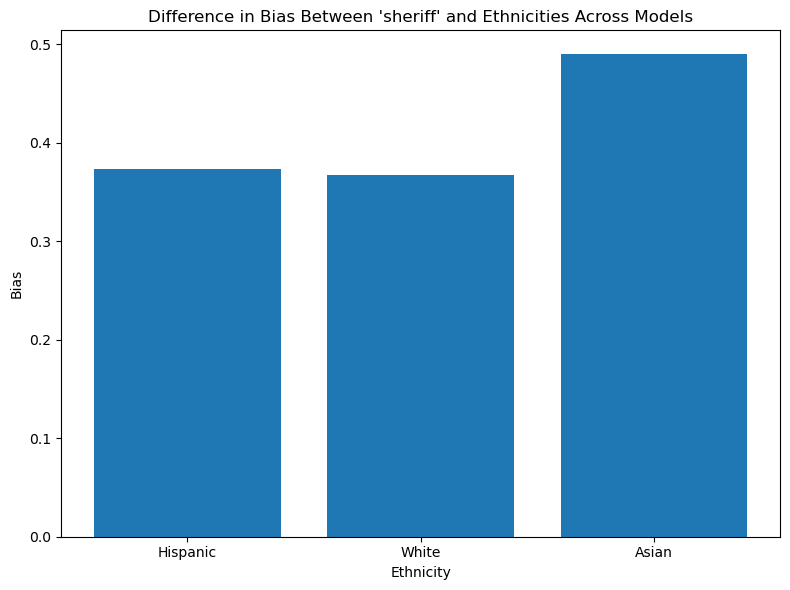

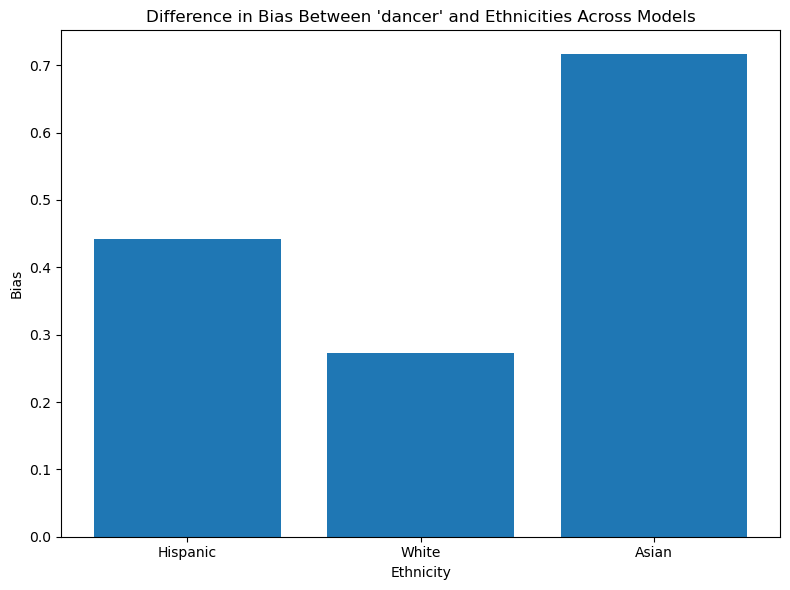

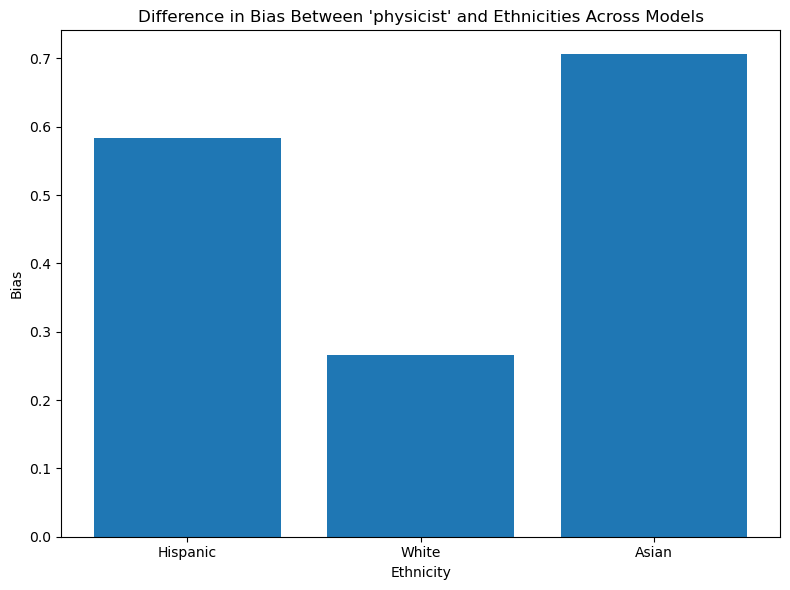

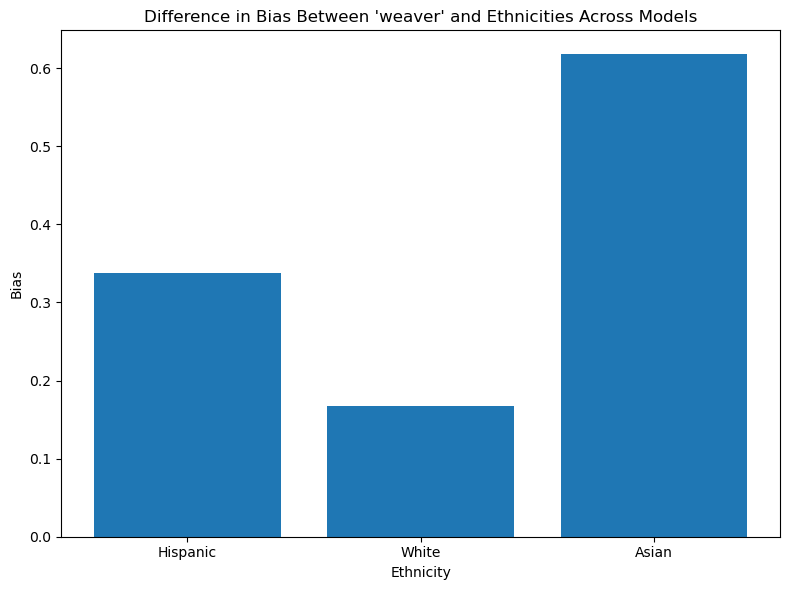

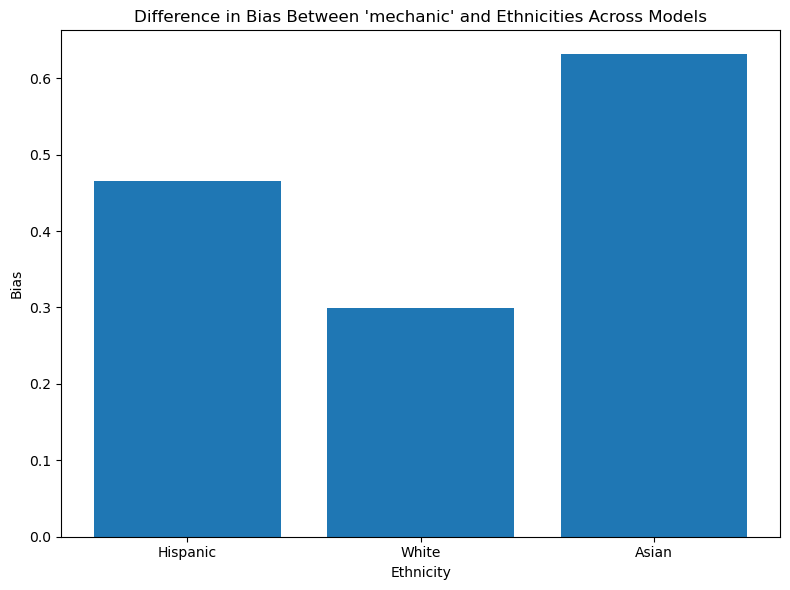

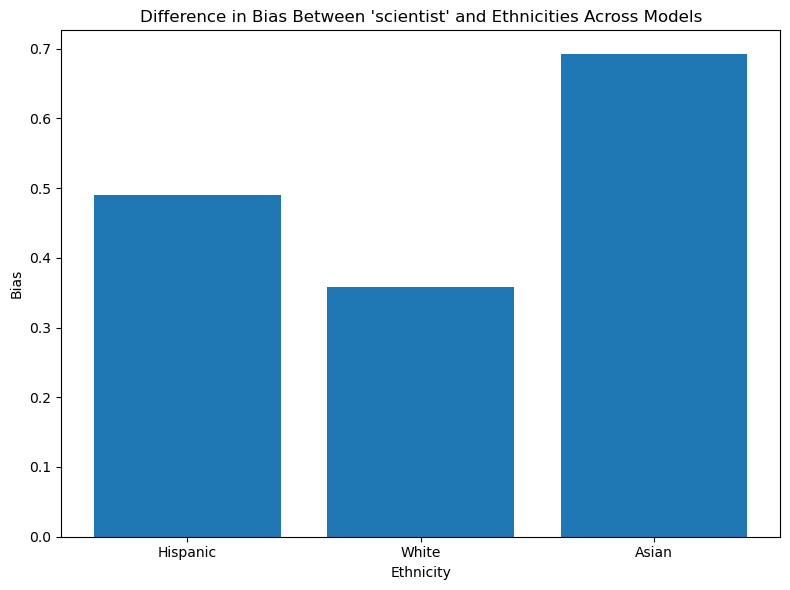

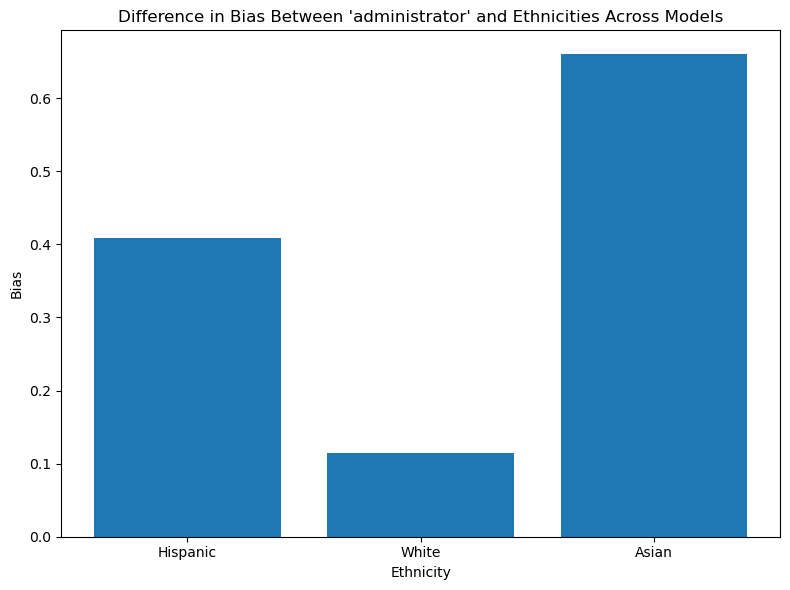

TypeError: only size-1 arrays can be converted to Python scalars

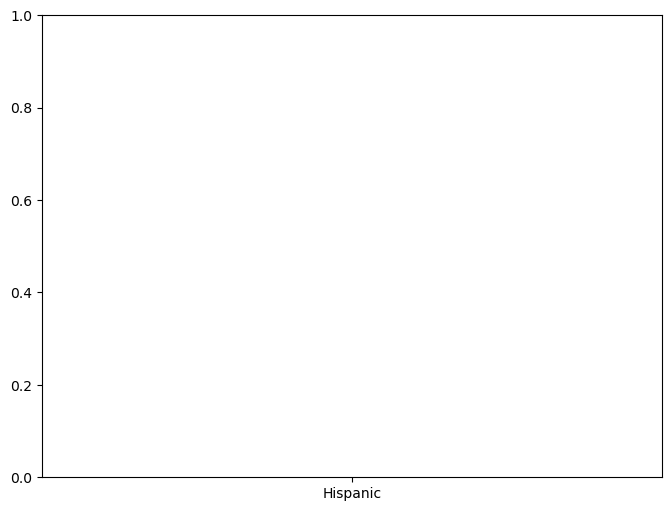

In [11]:
# Define list of all professions
professions = ['housekeeper', 'professor', 'smith', 'mason', 'official', 'blacksmith',
               'artist', 'secretary', 'janitor', 'conductor', 'sheriff',
               'dancer', 'physicist', 'weaver', 'mechanic', 'scientist', 'administrator',
               'photographer', 'chemist', 'baker', 'tailor', 'cashier',
               'accountant', 'clergy', 'driver', 'engineer', 'photographer']

# Initialize an empty DataFrame to store bias values
bias_df = pd.DataFrame(index=professions, columns=['Hispanic', 'White', 'Asian'])

# Calculate bias for each model
for name in variable_names:
    # Load the model
    model_filename = f"word2vec-{name}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    
    # Calculate bias between each profession and each ethnicity
    for profession in professions:
        # Calculate bias between "Hispanic" and profession
        bias_hispanic = model.wv.similarity('hispanic', profession)
        
        # Calculate bias between "White" and profession
        bias_white = model.wv.similarity('white', profession)
        
        # Calculate bias between "Asian" and profession
        bias_asian = model.wv.similarity('asian', profession)
        
        bias_df.loc[profession, 'Hispanic'] = bias_hispanic
        bias_df.loc[profession, 'White'] = bias_white
        bias_df.loc[profession, 'Asian'] = bias_asian

# Plotting individual charts for each word pair
for profession in professions:
    plt.figure(figsize=(8, 6))
    plt.bar(['Hispanic', 'White', 'Asian'], bias_df.loc[profession])
    plt.title(f"Difference in Bias Between '{profession}' and Ethnicities Across Models")
    plt.xlabel('Ethnicity')
    plt.ylabel('Bias')
    plt.tight_layout()
    plt.show()